In [4]:
#just solution
import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import cmudict
import os
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import string

In [14]:
input_file = "Just_dial.xlsx"
df_input = pd.read_excel(input_file)

In [15]:
def extract_article_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Check if 'h1' element exists before accessing its 'text' attribute
        article_title_element = soup.find('a')
        if article_title_element:
            article_title = article_title_element.text.strip()
        else:
            article_title = "No Title Found"

        # Find the article text
        article_text_elements = soup.find_all('p')
        article_text = '\n'.join([p.text for p in article_text_elements])

        return article_title, article_text
    else:
        print(f"Error: Could not retrieve content from {url}")
        return None, None


In [16]:
for index, row in df_input.iterrows():
    url_id = row["URL_ID"]
    url = row["URL"]
    article_title, article_text = extract_article_content(url)
    
    if article_title and article_text:
    # Save the article content in a text file
        with open(f"{url_id}.txt", "w", encoding="utf-8") as file:
            file.write(article_title + "\n")
            file.write(article_text)

Error: Could not retrieve content from https://www.justdial.com/Pune/Schools/nct-10422444


In [17]:
#new

In [ ]:
#by selenium

In [78]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# service = Service()
# from webdriver_manager.chrome import ChromeDriverManager
# pip install webdriver-manager
# from selenium.webdriver.common.by import by
# options = webdriver.ChromeOptions()

# driver = webdriver.Chrome(options = options, service = service(ChromeDriverManager(driver_version = "116.0.5845.179").install()))

# from selenium import webdriver
# from Selenium.webdriver.common.keys import Keys
# from Selenium.webdriver.common.by import By

In [ ]:
#main code

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
options = Options()
options.page_load_strategy = 'eager'
driver = webdriver.Chrome(options=options)
driver.get("https://www.justdial.com/Pune/Computer-Repair-Services/nct-10890482")



In [194]:
driver.implicitly_wait(18)  #wait for page to load

In [2]:
page_source = driver.page_source

In [125]:
soup = BeautifulSoup(page_source, 'html.parser')   #soup = BeautifulSoup(driver.page_source, 'html.parser')

In [131]:
print(soup.prettify)   # soup = soup.prettify

AttributeError: 'function' object has no attribute 'prettify'

In [199]:
# Initialize empty lists to store data
names = []
phone_numbers = []
addresses = []


In [224]:
listings

[<div class="jsx-a3a43292cc1e6428 resultbox_left pr-20" style="min-height:1500px"><div class="jsx-a3a43292cc1e6428 resultbox_listview"><div class="jsx-a3a43292cc1e6428 results_listing_container"><div><div class="jsx-ed65574b6120db48"><div class="jsx-3349e7cd87e12d75 resultbox" id="020PXX20.XX20.220905122454.N1H1"><div class="jsx-3349e7cd87e12d75 resultbox_info"><div class="jsx-3349e7cd87e12d75 resultbox_imagebox complist_img" title="Go - Tech Solution Near Morya Gosavib Krida Sankul Chinchwad, pune"><a class="jsx-3349e7cd87e12d75" href="/Pune/Go-Tech-Solution-Near-Morya-Gosavib-Krida-Sankul-Chinchwad/020PXX20-XX20-220905122454-N1H1_BZDET?ncatid=10890482&amp;area=&amp;search=Top%20Computer%20Repair%20&amp;%20Services%20in%20Pune&amp;mncatname=Computer%20Repair%20%26%20Services&amp;abd_btn=&amp;abd_heading=" target="_self" title="Go - Tech Solution Near Morya Gosavib Krida Sankul Chinchwad, pune"><span style="box-sizing:border-box;display:block;overflow:hidden;width:initial;height:initia

In [45]:
listings = soup.find_all(class_="jsx-a3a43292cc1e6428 resultbox_left pr-20")

In [50]:
for lists in listings:
    name = listing.find("a",class_="jjsx-3349e7cd87e12d75 jdicon results_thumb_icon mr-4 ").text.strip()
    phone_number = listings.find(class_="jsx-3349e7cd87e12d75 callcontent callNowAnchor").text.strip()
    address = listing.find(class_="jsx-10a73b11c119ce99 vendorinfo_address font16 fw400 color111 mb-10 pl-20 pr-20").text.strip()
    names.append(name)
    phone_numbers.append(phone_number)
    addresses.append(address)

AttributeError: 'NoneType' object has no attribute 'text'

In [229]:
# Create a pandas DataFrame to store the data
data = pd.DataFrame({
    "Name": names,
    "Phone Number": phone_numbers,
    "Address": addresses
})

In [230]:
data

,Name,Phone Number,Address
0,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
1,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
2,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
3,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
4,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
...,...,...,...
878898,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
878899,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
878900,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad
878901,Go - Tech Solution,08296699387,Keshav Nagar Chinchwad


In [219]:
# Save the data to an Excel file
data.to_excel("justdial_data.xlsx", index=False, engine='openpyxl')

<html lang="en"><head><meta charset="utf-8" class="jsx-a6352cb5386a20f"/><link class="jsx-a6352cb5386a20f" href="//akam.cdn.jdmagicbox.com" rel="dns-prefetch"/><link class="jsx-a6352cb5386a20f" href="//content.jdmagicbox.com" rel="dns-prefetch"/><link class="jsx-a6352cb5386a20f" href="//content.jdmagicbox.com" rel="preconnect"/><link class="jsx-a6352cb5386a20f" href="https://fonts.googleapis.com" rel="preconnect"/><link class="jsx-a6352cb5386a20f" href="https://fonts.gstatic.com" rel="preconnect"/><meta class="jsx-a6352cb5386a20f" content="#fff" name="theme-color"/><title class="jsx-a3a43292cc1e6428">Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial</title><meta class="jsx-a3a43292cc1e6428" content="Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial" name="Title"/><meta class="jsx-a3a43292cc1e6428" content="8788 Computer Repair Services in Pune. Find ✓Computer Service Centres, ✓Motherboard Repair, ✓PC Repair, ✓Computer Data Rec
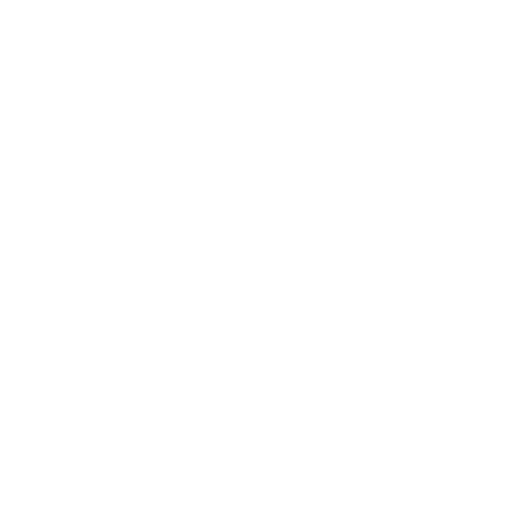

In [108]:
paras = soup.find_all('p')

In [109]:
print(paras)

[<p aria-live="assertive" id="__next-route-announcer__" role="alert" style="border: 0px; clip: rect(0px, 0px, 0px, 0px); height: 1px; margin: -1px; overflow: hidden; padding: 0px; position: absolute; width: 1px; white-space: nowrap; overflow-wrap: normal;"></p>]


In [14]:
anchor = soup.find_all('a')

In [15]:
anchor

[<a class="jsx-3999c22be6dd4a22 animate__animated header_jdlogo" href="/"><img alt="Justdial Logo" class="jsx-3999c22be6dd4a22" height="25" src="https://akam.cdn.jdmagicbox.com/images/icontent/jdrwd/jdlogosvg.svg" width="102"/></a>,
 <a class="jsx-3999c22be6dd4a22 headnav_item_anchor whitefill_animate" href="https://www.justdial.com/Advertise?cta_from=W_hmpge_web_header_advertise"><div class="jsx-3999c22be6dd4a22 nav_advertise_icon jdicon"></div><div class="jsx-3999c22be6dd4a22 headnav_item_text pl-5 font14 fw400 color111">Advertise</div></a>,
 <a class="jsx-3999c22be6dd4a22 headnav_item_anchor whitefill_animate" href="https://www.justdial.com/Free-Listing?cta_from=W_hmpge_web_header_freelisting"><div class="jsx-3999c22be6dd4a22 nav_listing_icon jdicon"></div><div class="jsx-3999c22be6dd4a22 headnav_item_text pl-5 font14 fw400 color111">Free Listing</div><div class="jsx-3999c22be6dd4a22 headnav_tag font8 fw700 colorFFF text_uppercase mr-4">Business</div></a>,
 <a class="jsx-a3a43292cc1

In [46]:
print(soup.find('p')['id'])

__next-route-announcer__


In [36]:
print(soup.find_all('p',class_='lead'))

[]


In [43]:
print(soup.get_text())                                                            #get text

Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial

You are currently viewing results for"Pune" CityFor more accurate results “near me”Update LocationSearch using voiceSearch the businessesEnglish हिंदीमराठीবেঙ্গলিગુજરાતીಕನ್ನಡதமிழ்AdvertiseFree ListingBusinessLogin / Sign UpPuneComputer Repair & Services in Pune8788+ ListingsTop Computer Repair & Services in Pune Top rated Laps N Comps P4.0107 RatingsThis business Information is verified by Justdial.WanowrieOpen  until 8:00 pm16 Years in BusinessComputer RepairLaptop RepairIt was great to find a place where they could fix my MacBook after Apple suggested there was nothing to do but buy a new computer. They have great customer service and ac...more09035124094Send EnquiryChatResponds in  5 Mins 23 people recently enquiredMost searched Dr Pc D4.2329 RatingsThis business Information is verified by Justdial.HadapsarAvailable  until 9:00 pm10 Years in HealthcareLaptop RepairComputer RepairIf you are looking for t

In [54]:
# Initialize empty lists to store data
names = []
phone_numbers = []
addresses = []

In [60]:
while listing in listings:
    name = listing.find("div",class_="jjsx-3349e7cd87e12d75 jdicon results_thumb_icon mr-4 ").text.strip()
    phone_number = listing.find("span",class_="jjsx-3349e7cd87e12d75 whitecall_icon jdicon mr-10 callNowAnchor").text.strip()
    address = listing.find("div",class_="jsx-3349e7cd87e12d75 font15 fw400 color111").text.strip()
    names.append(name)
    phone_numbers.append(phone_number)
    addresses.append(address)

In [58]:
# Create a pandas DataFrame to store the data
data = pd.DataFrame({
    "Name": names,
    "Phone Number": phone_numbers,
    "Address": addresses
})

In [56]:
data

,Name,Phone Number,Address


In [ ]:
#practice

In [60]:
print(type(soup.p))

<class 'bs4.element.Tag'>


In [71]:
shop_name = soup.find(class_='jsx-3349e7cd87e12d75 jdicon results_thumb_icon mr-4')

In [77]:
print(shop_name.childrens)

None


In [117]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [160]:
listings = soup.find_all(class_="store-details")

In [44]:
for listing in listings:
    # Extract name
    name = listing.find(class_="lng_cont_name").text.strip()
    # Extract phone number
    phone_element = listing.find(class_="mobilesv")
    phone_number = phone_element.get_text(strip=True)
    print(f"Name: {name}\nPhone Number: {phone_number}\n")

AttributeError: 'NoneType' object has no attribute 'text'

In [164]:
title = soup.title


In [165]:
print(title)

<title class="jsx-a3a43292cc1e6428">Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial</title>


In [87]:
listings_s = soup.find(class_ ='jsx-3349e7cd87e12d75 resultbox_info')

In [92]:
print(listings_s.children)     #children does use your storage and easy to iterate #content use the storage and due to this make it slow



In [96]:
for ele in listings_s.stripped_strings:
    print(ele)

Top rated
Laps N Comps
P
4.0
107
Ratings
This business Information is verified by Justdial.
Wanowrie
Open
until 8:00 pm
16 Years in Business
Computer Repair
Laptop Repair
It was great to find a place where they could fix my MacBook after Apple suggested there was nothing to do but buy a new computer. They have great customer service and ac...
more
09035124094
Send Enquiry
Chat
Responds in
5
Mins
23
people recently enquired


In [98]:
print(listings_s.parents)

<generator object PageElement.parents at 0x7f8f1ad19740>


In [100]:
for ele in listings_s.parents:
    print(ele.name)

div
div
div
div
div
div
div
div
section
section
div
noscript
noscript
body
html
[document]


In [126]:
soup = soup.prettify

<bound method Tag.prettify of <html lang="en"><head><meta charset="utf-8" class="jsx-a6352cb5386a20f"/><link class="jsx-a6352cb5386a20f" href="//akam.cdn.jdmagicbox.com" rel="dns-prefetch"/><link class="jsx-a6352cb5386a20f" href="//content.jdmagicbox.com" rel="dns-prefetch"/><link class="jsx-a6352cb5386a20f" href="//content.jdmagicbox.com" rel="preconnect"/><link class="jsx-a6352cb5386a20f" href="https://fonts.googleapis.com" rel="preconnect"/><link class="jsx-a6352cb5386a20f" href="https://fonts.gstatic.com" rel="preconnect"/><meta class="jsx-a6352cb5386a20f" content="#fff" name="theme-color"/><title class="jsx-a3a43292cc1e6428">Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial</title><meta class="jsx-a3a43292cc1e6428" content="Top Computer Repair Services in Pune - Best Computer Service Centres - Justdial" name="Title"/><meta class="jsx-a3a43292cc1e6428" content="8788 Computer Repair Services in Pune. Find ✓Computer Service Centres, ✓Motherboard Repair, 
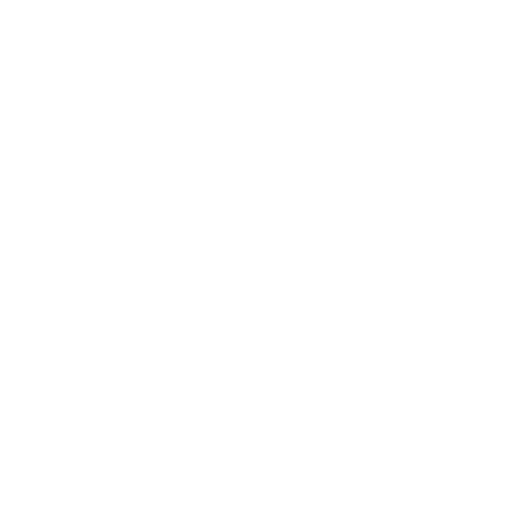

In [121]:
soup

In [128]:
print(soup.get_text())

AttributeError: 'function' object has no attribute 'get_text'

In [ ]:
class = jsx-a3a43292cc1e6428 resultbox_left pr-20


jsx-a3a43292cc1e6428 resultbox_listview

In [136]:
list_all = soup.find('div',class_='jsx-a3a43292cc1e6428 resultbox_listview')

In [137]:
print(list_all)

<div class="jsx-a3a43292cc1e6428 resultbox_listview"><div class="jsx-a3a43292cc1e6428 results_listing_container"><div><div class="jsx-ed65574b6120db48"><div class="jsx-3349e7cd87e12d75 resultbox" id="020PXX20.XX20.090831153523.N2V3"><div class="jsx-3349e7cd87e12d75 resultbox_info"><div class="jsx-3349e7cd87e12d75 resultbox_imagebox complist_img" title="Easy Services (Ashoka Mall) Opp Hotel Sun N Sand Bund Garden Road, Pune"><a class="jsx-3349e7cd87e12d75" href="/Pune/Easy-Services-Ashoka-Mall-Opp-Hotel-Sun-N-Sand-Bund-Garden-Road/020PXX20-XX20-090831153523-N2V3_BZDET?ncatid=10890482&amp;area=&amp;search=Top%20Computer%20Repair%20&amp;%20Services%20in%20Pune&amp;mncatname=Computer%20Repair%20%26%20Services&amp;abd_btn=&amp;abd_heading=" target="_self" title="Easy Services (Ashoka Mall) Opp Hotel Sun N Sand Bund Garden Road, Pune"><span style="box-sizing:border-box;display:block;overflow:hidden;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;position:ab

In [139]:
len(list_all.find_all('h2','a target="_self"'))

0

In [37]:
listings = soup.find_all(class_="jsx-a3a43292cc1e6428 resultbox_listview")

In [34]:
for listing in listings:
    name = listings.find("a",class_="jjsx-3349e7cd87e12d75 jdicon results_thumb_icon mr-4 ").text.strip()
    phone_number = listing.find(class_="jsx-3349e7cd87e12d75 callcontent callNowAnchor").text.strip()
    address = listing.find(class_="jsx-10a73b11c119ce99 vendorinfo_address font16 fw400 color111 mb-10 pl-20 pr-20").text.strip()
    names.append(name)
    phone_numbers.append(phone_number)
    addresses.append(address)

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [30]:
for listing in listings:
    print(listing)
    

<div class="jsx-a3a43292cc1e6428 resultbox_left pr-20" style="min-height:1500px"><div class="jsx-a3a43292cc1e6428 resultbox_listview"><div class="jsx-a3a43292cc1e6428 results_listing_container"><div><div class="jsx-ed65574b6120db48"><div class="jsx-3349e7cd87e12d75 resultbox" id="020PXX20.XX20.230525120013.Q8N2"><div class="jsx-3349e7cd87e12d75 resultbox_info"><div class="jsx-3349e7cd87e12d75 resultbox_imagebox complist_img" title="Baya Computer Pvt Ltd Near Karachi Hotel Pimpri Colony, pune"><a class="jsx-3349e7cd87e12d75" href="/Pune/Baya-Computer-Pvt-Ltd-Near-Karachi-Hotel-Pimpri-Colony/020PXX20-XX20-230525120013-Q8N2_BZDET?ncatid=10890482&amp;area=&amp;search=Top%20Computer%20Repair%20&amp;%20Services%20in%20Pune&amp;mncatname=Computer%20Repair%20%26%20Services&amp;abd_btn=&amp;abd_heading=" target="_self" title="Baya Computer Pvt Ltd Near Karachi Hotel Pimpri Colony, pune"><span style="box-sizing:border-box;display:block;overflow:hidden;width:initial;height:initial;background:none

In [39]:
print(listings)

[<div class="jsx-a3a43292cc1e6428 resultbox_listview"><div class="jsx-a3a43292cc1e6428 results_listing_container"><div><div class="jsx-ed65574b6120db48"><div class="jsx-3349e7cd87e12d75 resultbox" id="020PXX20.XX20.230525120013.Q8N2"><div class="jsx-3349e7cd87e12d75 resultbox_info"><div class="jsx-3349e7cd87e12d75 resultbox_imagebox complist_img" title="Baya Computer Pvt Ltd Near Karachi Hotel Pimpri Colony, pune"><a class="jsx-3349e7cd87e12d75" href="/Pune/Baya-Computer-Pvt-Ltd-Near-Karachi-Hotel-Pimpri-Colony/020PXX20-XX20-230525120013-Q8N2_BZDET?ncatid=10890482&amp;area=&amp;search=Top%20Computer%20Repair%20&amp;%20Services%20in%20Pune&amp;mncatname=Computer%20Repair%20%26%20Services&amp;abd_btn=&amp;abd_heading=" target="_self" title="Baya Computer Pvt Ltd Near Karachi Hotel Pimpri Colony, pune"><span style="box-sizing:border-box;display:block;overflow:hidden;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;position:absolute;top:0;left:0;bottom:0;r

In [43]:
len(listings)

2

In [11]:
print(name)

Baya Computer Pvt Ltd


In [29]:
for listing in listings:
    # Extract name
    name = listing.find(class_="jsx-ed65574b6120db48 ").text.strip()
    names.append(name)

AttributeError: 'NoneType' object has no attribute 'text'

[]


In [ ]:
#end 7 sep

In [175]:
# Don't forget to close the driver when you're done
driver.quit()

In [ ]:
target = soup.find("dl", class_="investment_sought")
print (target.text)
figure = target.find("dd").text
print figure

In [ ]:
#practice

In [83]:
url = 'https://www.snapdeal.com'

In [ ]:
#get the html

In [84]:
r = requests.get(url)

In [85]:
htmlContent = r.content

In [86]:
print(htmlContent)

b'<!DOCTYPE html>\n\t<!--[if IE 8]><html lang="en" class="ie ie8 lt-ie9 lt-ie10"> <![endif]-->\n<!--[if IE 9]><html lang="en" class="ie ie9 lt-ie10"> <![endif]-->\n<!--[if IE]><html lang="en" class="ie"><![endif]-->\n<!--[if gt IE 9]><!--><html lang="en"><!--<![endif]-->\n\t<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb# snapdeallog: https://ogp.me/ns/fb/snapdeallog#">\n\t\t<link rel="dns-prefetch" href="https://i1.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://i2.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://i3.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://i4.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://n1.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://n2.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://n3.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://n4.sdlcdn.com" />\r\n\t<link rel="dns-prefetch" href="https://sa.snapdeal.com" />\r\n\t<link rel="dns-prefetch" href="https://search-su

In [48]:
soup = BeautifulSoup(htmlContent,'html.parser')

In [51]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html><head><meta charset="utf-8"/><link data-href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600&amp;display=swap" data-optimized-fonts="true" rel="stylesheet"/><link href="/img/favicon.ico" rel="shortcut icon" type="image/x-icon"/><meta content="width=device-width, initial-scale=1" name="viewport"/><script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-9655830461045889"></script><title>Learn to code online - CodeWithHarry</title><meta content="Generated by create next app" name="description"/><link href="/img/favicon.ico" rel="icon"/><meta content="8" name="next-head-count"/><meta name="next-font-preconnect"/><link as="style" href="/_next/static/css/20a6651d5aa346c5.css" rel="preload"/><link data-n-g="" href="/_next/static/css/20a6651d5aa346c5.css" rel="stylesheet"/><link as="style" href="/_next/static/css/470c5e8db7cdc7e9.css" rel="preload"/><link

In [ ]:
#step 3 tree traversal

In [52]:
title = soup.title

In [53]:
print(title)

<title>Learn to code online - CodeWithHarry</title>


In [54]:
type(title) #tag

bs4.element.Tag

In [72]:
paragraph = soup.find_all('p')   #paragraph 

anchor = soup.find_all('a')   # anchor tag
    
print(soup.find('p'))   #first paragraph
    
    
    
    
    
    
    
    
    
    

<p class="mt-2 text-sm text-gray-500 md:text-base dark:text-gray-400">Confused on which course to take? I have got you covered. Browse courses and find out the best course for you. Its free! Code With Harry is my attempt to teach basics and those coding techniques to people in short time which took me ages to learn.</p>


In [66]:
anchor


[<a href="/">Home</a>,
 <a href="/videos/">Courses</a>,
 <a href="/tutorials/">Tutorial</a>,
 <a href="/blog/">Blog</a>,
 <a href="/notes/">Notes</a>,
 <a href="/contact/">Contact</a>,
 <a href="/my-gear/">My Gear</a>,
 <a href="/work/">Work With Us</a>,
 <a href="/tutorial/html-home/">HTML</a>,
 <a href="/tutorial/css-home/">CSS</a>,
 <a href="/tutorial/js/">JS</a>,
 <a href="/tutorial/c/">C</a>,
 <a href="/tutorial/cplusplus/">C++</a>,
 <a href="/tutorial/java/">JAVA</a>,
 <a href="/tutorial/python/">PYTHON</a>,
 <a href="/tutorial/php/">PHP</a>,
 <a href="/tutorial/react-home/">REACT JS</a>,
 <a href="/">Home</a>,
 <a href="/videos/">Courses</a>,
 <a href="/tutorial/html-home/">HTML</a>,
 <a href="/tutorial/css-home/">CSS</a>,
 <a href="/tutorial/js/">JS</a>,
 <a href="/tutorial/c/">C</a>,
 <a href="/tutorial/cplusplus/">C++</a>,
 <a href="/tutorial/java/">JAVA</a>,
 <a href="/tutorial/python/">PYTHON</a>,
 <a href="/tutorial/php/">PHP</a>,
 <a href="/tutorial/react-home/">REACT JS<

In [73]:
print(soup.find('p')['class']) 

['mt-2', 'text-sm', 'text-gray-500', 'md:text-base', 'dark:text-gray-400']


In [ ]:
#find all the element with class lead


